In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error

# Define the Shor code
def shor_code():
    qc = QuantumCircuit(9, 9)
    
    # Encoding part
    qc.cx(0, 6)
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(1, 4)
    qc.cx(2, 4)
    qc.cx(2, 5)
    qc.cx(6, 7)
    qc.cx(3, 7)
    qc.cx(4, 7)
    qc.cx(5, 7)
    
    # Error correction part
    qc.cx(3, 6)
    qc.cx(4, 6)
    qc.cx(5, 6)
    qc.cx(0, 8)
    qc.cx(1, 8)
    qc.cx(2, 8)
    qc.barrier()
    
    # Measure
    for i in range(9):
        qc.measure(i, i)
        
    return qc

# Define a function to apply depolarizing noise
def apply_noise(circuit, noise_rate):
    noise_model = NoiseModel()
    for qubit in range(9):
        noise_model.add_quantum_error(depolarizing_error(noise_rate, 1), ["id"], [qubit])
    return noise_model.compose(circuit, inplace=False)

# Simulate the circuit with noise
def simulate_with_noise(circuit, noise_rate):
    simulator = Aer.get_backend('qasm_simulator')
    noise_circuit = apply_noise(circuit, noise_rate)
    job = execute(noise_circuit, simulator, shots=1000)
    result = job.result()
    counts = result.get_counts(noise_circuit)
    return counts

# Calculate the number of bit flips
def calculate_bit_flips(counts):
    total_bit_flips = 0
    for output in counts:
        bit_flips = 0
        for i in range(9):
            if output[i] == '1':
                bit_flips += 1
        total_bit_flips += bit_flips * counts[output]
    return total_bit_flips

# Define the range of noise rates to simulate
noise_rates = np.linspace(0, 0.1, 11)

# Simulate and plot
bit_flips_list = []
for noise_rate in noise_rates:
    counts = simulate_with_noise(shor_code(), noise_rate)
    bit_flips = calculate_bit_flips(counts)
    bit_flips_list.append(bit_flips)

plt.plot(noise_rates, bit_flips_list, marker='o')
plt.xlabel('Physical Error Rate')
plt.ylabel('Number of Bit Flips')
plt.title('Shor 9-qubit Quantum Error Correcting Code')
plt.grid(True)
plt.show()


AttributeError: 'NoiseModel' object has no attribute 'compose'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import circuit_drawer

# Define the Shor code
def shor_code():
    qc = QuantumCircuit(9, 9)
    
    # Encoding part
    qc.cx(0, 6)
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(1, 4)
    qc.cx(2, 4)
    qc.cx(2, 5)
    qc.cx(6, 7)
    qc.cx(3, 7)
    qc.cx(4, 7)
    qc.cx(5, 7)
    
    # Error correction part
    qc.cx(3, 6)
    qc.cx(4, 6)
    qc.cx(5, 6)
    qc.cx(0, 8)
    qc.cx(1, 8)
    qc.cx(2, 8)
    qc.barrier()
    
    # Measure
    for i in range(9):
        qc.measure(i, i)
        
    return qc

# Print the quantum circuit
qc = shor_code()
print("Quantum Circuit:")
qc.draw()

Quantum Circuit:


»
q_0: ──■────■─────────■────────────────────────────────────────────────────»
       │    │         │                                                    »
q_1: ──┼────┼────■────┼────■───────────────────■───────────────────────────»
       │    │    │    │    │                   │                           »
q_2: ──┼────┼────┼────┼────┼─────────■─────────┼────■───────────────────■──»
       │  ┌─┴─┐┌─┴─┐  │    │         │         │    │                   │  »
q_3: ──┼──┤ X ├┤ X ├──┼────┼────■────┼────■────┼────┼───────────────────┼──»
       │  └───┘└───┘  │  ┌─┴─┐  │  ┌─┴─┐  │    │    │                   │  »
q_4: ──┼──────────────┼──┤ X ├──┼──┤ X ├──┼────┼────┼────■─────────■────┼──»
       │              │  └───┘  │  └───┘  │    │  ┌─┴─┐  │         │    │  »
q_5: ──┼──────────────┼─────────┼─────────┼────┼──┤ X ├──┼────■────┼────┼──»
     ┌─┴─┐            │         │       ┌─┴─┐  │  └───┘  │    │  ┌─┴─┐  │  »
q_6: ┤ X ├──■─────────┼─────────┼───────┤ X ├──┼─────────┼────┼──┤ X ├──┼──»
     └───┘┌─┴─┐       │       ┌─┴─┐     └───┘  │       ┌─┴─┐┌─┴─┐└───┘  │  »
q_7: ─────┤ X ├───────┼───────┤ X ├────────────┼───────┤ X ├┤ X ├───────┼──»
          └───┘     ┌─┴─┐     └───┘          ┌─┴─┐     └───┘└───┘     ┌─┴─┐»
q_8: ───────────────┤ X ├────────────────────┤ X ├────────────────────┤ X ├»
                    └───┘                    └───┘                    └───┘»
c_0: ══════════════════════════════════════════════════════════════════════»
                                                                           »
c_1: ══════════════════════════════════════════════════════════════════════»
                                                                           »
c_2: ══════════════════════════════════════════════════════════════════════»
                                                                           »
c_3: ══════════════════════════════════════════════════════════════════════»
                                                                           »
c_4: ══════════════════════════════════════════════════════════════════════»
                                                                           »
c_5: ══════════════════════════════════════════════════════════════════════»
                                                                           »
c_6: ══════════════════════════════════════════════════════════════════════»
                                                                           »
c_7: ══════════════════════════════════════════════════════════════════════»
                                                                           »
c_8: ══════════════════════════════════════════════════════════════════════»
                                                                           »
«           ░ ┌─┐                        
«q_0: ──────░─┤M├────────────────────────
«           ░ └╥┘┌─┐                     
«q_1: ──────░──╫─┤M├─────────────────────
«           ░  ║ └╥┘┌─┐                  
«q_2: ──────░──╫──╫─┤M├──────────────────
«           ░  ║  ║ └╥┘┌─┐               
«q_3: ──────░──╫──╫──╫─┤M├───────────────
«           ░  ║  ║  ║ └╥┘┌─┐            
«q_4: ──────░──╫──╫──╫──╫─┤M├────────────
«           ░  ║  ║  ║  ║ └╥┘┌─┐         
«q_5: ──■───░──╫──╫──╫──╫──╫─┤M├─────────
«     ┌─┴─┐ ░  ║  ║  ║  ║  ║ └╥┘┌─┐      
«q_6: ┤ X ├─░──╫──╫──╫──╫──╫──╫─┤M├──────
«     └───┘ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
«q_7: ──────░──╫──╫──╫──╫──╫──╫──╫─┤M├───
«           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
«q_8: ──────░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
«           ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
«c_0: ═════════╩══╬══╬══╬══╬══╬══╬══╬══╬═
«                 ║  ║  ║  ║  ║  ║  ║  ║ 
«c_1: ════════════╩══╬══╬══╬══╬══╬══╬══╬═
«                    ║  ║  ║  ║  ║  ║  ║ 
«c_2: ═══════════════╩══╬══╬══╬══╬══╬══╬═
«                       ║  ║  ║  ║  ║  ║ 
«c_3: ══════════════════╩══╬══╬══╬══╬══╬═
«                          ║  ║  ║  ║  ║ 
«c_4: ═════════════════════╩══╬══╬══╬══╬═
«                             ║  ║  ║  ║ 
«c_5: ══

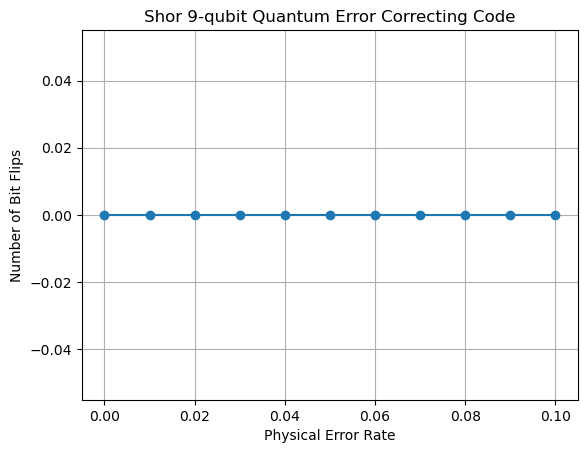

In [7]:
def simulate_with_noise(circuit, noise_rate):
    simulator = Aer.get_backend('qasm_simulator')
    noise_model = NoiseModel()
    for qubit in range(9):
        noise_model.add_quantum_error(depolarizing_error(noise_rate, 1), ["id"], [qubit])
    job = execute(circuit, simulator, shots=1000, noise_model=noise_model)
    result = job.result()
    counts = result.get_counts(circuit)
    return counts

# Calculate the number of bit flips
def calculate_bit_flips(counts):
    total_bit_flips = 0
    for output in counts:
        bit_flips = 0
        for i in range(9):
            if output[i] == '1':
                bit_flips += 1
        total_bit_flips += bit_flips * counts[output]
    return total_bit_flips

# Define the range of noise rates to simulate
noise_rates = np.linspace(0, 0.1, 11)

# Simulate and plot
bit_flips_list = []
for noise_rate in noise_rates:
    counts = simulate_with_noise(shor_code(), noise_rate)
    bit_flips = calculate_bit_flips(counts)
    bit_flips_list.append(bit_flips)

plt.plot(noise_rates, bit_flips_list, marker='o')
plt.xlabel('Physical Error Rate')
plt.ylabel('Number of Bit Flips')
plt.title('Shor 9-qubit Quantum Error Correcting Code')
plt.grid(True)
plt.show()

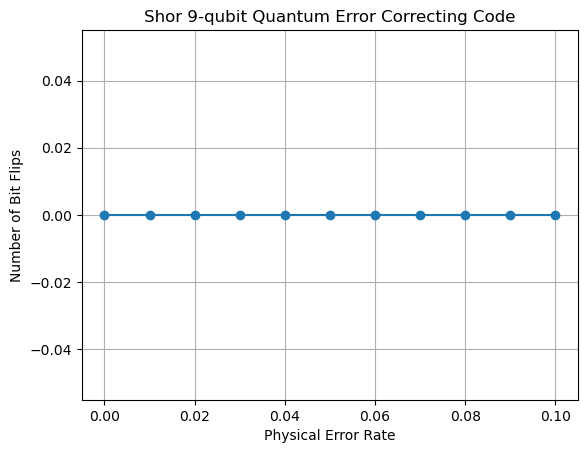

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error

# Define the Shor code
def shor_code():
    qc = QuantumCircuit(9, 9)
    
    # Encoding part
    qc.cx(0, 6)
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(1, 4)
    qc.cx(2, 4)
    qc.cx(2, 5)
    qc.cx(6, 7)
    qc.cx(3, 7)
    qc.cx(4, 7)
    qc.cx(5, 7)
    
    # Error correction part
    qc.cx(3, 6)
    qc.cx(4, 6)
    qc.cx(5, 6)
    qc.cx(0, 8)
    qc.cx(1, 8)
    qc.cx(2, 8)
    qc.barrier()
    
    # Measure
    for i in range(9):
        qc.measure(i, i)
        
    return qc

# Simulate the circuit with noise
def simulate_with_noise(circuit, noise_rate):
    simulator = Aer.get_backend('qasm_simulator')
    noise_model = NoiseModel()
    for qubit in range(9):
        noise_model.add_quantum_error(depolarizing_error(noise_rate, 1), ["id"], [qubit])
    job = execute(circuit, simulator, shots=1000, noise_model=noise_model)
    result = job.result()
    counts = result.get_counts(circuit)
    return counts

# Calculate the number of bit flips
def calculate_bit_flips(counts):
    total_bit_flips = 0
    for output in counts:
        bit_flips = 0
        for i in range(9):
            if output[i] == '1':
                bit_flips += 1
        total_bit_flips += bit_flips * counts[output]
    return total_bit_flips

# Calculate the error rate per qubit
def calculate_error_rate(noise_rate):
    return 3 * noise_rate  # Assuming each qubit undergoes independent depolarizing noise

# Define the range of noise rates to simulate
noise_rates = np.linspace(0, 0.1, 11)

# Simulate and plot
bit_flips_list = []
for noise_rate in noise_rates:
    counts = simulate_with_noise(shor_code(), noise_rate)
    bit_flips = calculate_bit_flips(counts)
    bit_flips_list.append(bit_flips)

# Plot the results
plt.plot(noise_rates, bit_flips_list, marker='o')
plt.xlabel('Physical Error Rate')
plt.ylabel('Number of Bit Flips')
plt.title('Shor 9-qubit Quantum Error Correcting Code')
plt.grid(True)
plt.show()
